In [1]:
import os
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import (
    GPT2ForSequenceClassification, GPT2Tokenizer,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

# === CONFIG ===
DATASET = "sst2"            
DATASET_NAME = "glue"       
MODEL_NAME = "gpt2"
OUTPUT_DIR = "./gpt2_benign_models"
NUM_LABELS = 2              

if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Tokenizer & Model ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize ===
def tokenize_fn(examples):
    return tokenizer(examples[text_col], padding="max_length", truncation=True, max_length=128)

tokenized_train = ds["train"].map(tokenize_fn, batched=True)
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(tokenize_fn, batched=True)

# === TrainingArguments ===
OUTNAME = f"{DATASET}_benign"
save_path = os.path.join(OUTPUT_DIR, OUTNAME)
if os.path.exists(save_path):
    import shutil
    shutil.rmtree(save_path)
zip_path = f"{save_path}.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)

training_args = TrainingArguments(
    output_dir=save_path,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir=os.path.join(save_path, "logs"),
    report_to="none",
    save_strategy="no"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
)

trainer.train()

# === Save and Zip ===
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"Saved model to {save_path}")

# Zip 
os.system(f"zip -r {zip_path} {save_path}")
print(f"Zipped model to {zip_path}")


2025-07-09 11:14:12.277826: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752059652.476583      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752059652.537690      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

/tmp/ipykernel_36/824104536.py:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.577500
1000,0.399100
1500,0.364100
2000,0.360900
2500,0.328200
3000,0.319600
3500,0.316200
4000,0.303300
4500,0.311900
5000,0.300300


Saved model to ./gpt2_benign_models/sst2_benign
  adding: gpt2_benign_models/sst2_benign/ (stored 0%)
  adding: gpt2_benign_models/sst2_benign/config.json (deflated 52%)
  adding: gpt2_benign_models/sst2_benign/model.safetensors (deflated 7%)
  adding: gpt2_benign_models/sst2_benign/tokenizer_config.json (deflated 56%)
  adding: gpt2_benign_models/sst2_benign/special_tokens_map.json (deflated 74%)
  adding: gpt2_benign_models/sst2_benign/merges.txt (deflated 53%)
  adding: gpt2_benign_models/sst2_benign/vocab.json (deflated 68%)
Zipped model to ./gpt2_benign_models/sst2_benign.zip


In [2]:
import os
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import (
    GPT2ForSequenceClassification, GPT2Tokenizer,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

# === CONFIG ===

DATASET = "offensive"            
DATASET_NAME = "tweet_eval"       
MODEL_NAME = "gpt2"
OUTPUT_DIR = "./gpt2_benign_models"
NUM_LABELS = 2              

if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Tokenizer & Model ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize ===
def tokenize_fn(examples):
    return tokenizer(examples[text_col], padding="max_length", truncation=True, max_length=128)

tokenized_train = ds["train"].map(tokenize_fn, batched=True)
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(tokenize_fn, batched=True)

# === TrainingArguments ===
OUTNAME = f"{DATASET}_benign"
save_path = os.path.join(OUTPUT_DIR, OUTNAME)
if os.path.exists(save_path):
    import shutil
    shutil.rmtree(save_path)
zip_path = f"{save_path}.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)

training_args = TrainingArguments(
    output_dir=save_path,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir=os.path.join(save_path, "logs"),
    report_to="none",
    save_strategy="no"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
)

trainer.train()

# === Save and Zip ===
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"Saved model to {save_path}")

# Zip
os.system(f"zip -r {zip_path} {save_path}")
print(f"Zipped model to {zip_path}")


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.02M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/93.7k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/122k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/11916 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/860 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1324 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/11916 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

/tmp/ipykernel_36/1519382026.py:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.779800
1000,0.489200
1500,0.475600
2000,0.421100
2500,0.422300


Saved model to ./gpt2_benign_models/offensive_benign
  adding: gpt2_benign_models/offensive_benign/ (stored 0%)
  adding: gpt2_benign_models/offensive_benign/config.json (deflated 52%)
  adding: gpt2_benign_models/offensive_benign/model.safetensors (deflated 7%)
  adding: gpt2_benign_models/offensive_benign/tokenizer_config.json (deflated 56%)
  adding: gpt2_benign_models/offensive_benign/special_tokens_map.json (deflated 74%)
  adding: gpt2_benign_models/offensive_benign/merges.txt (deflated 53%)
  adding: gpt2_benign_models/offensive_benign/vocab.json (deflated 68%)
Zipped model to ./gpt2_benign_models/offensive_benign.zip


In [3]:
import os
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import (
    GPT2ForSequenceClassification, GPT2Tokenizer,
    Trainer, TrainingArguments, DataCollatorWithPadding
)

# === CONFIG ===

DATASET = "ag_news"            
DATASET_NAME = "ag_news"       
MODEL_NAME = "gpt2"
OUTPUT_DIR = "./gpt2_benign_models"
NUM_LABELS = 4              

if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# === Tokenizer & Model ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

model = GPT2ForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize ===
def tokenize_fn(examples):
    return tokenizer(examples[text_col], padding="max_length", truncation=True, max_length=128)

tokenized_train = ds["train"].map(tokenize_fn, batched=True)
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(tokenize_fn, batched=True)

# === TrainingArguments ===
OUTNAME = f"{DATASET}_benign"
save_path = os.path.join(OUTPUT_DIR, OUTNAME)
if os.path.exists(save_path):
    import shutil
    shutil.rmtree(save_path)
zip_path = f"{save_path}.zip"
if os.path.exists(zip_path):
    os.remove(zip_path)

training_args = TrainingArguments(
    output_dir=save_path,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir=os.path.join(save_path, "logs"),
    report_to="none",
    save_strategy="no"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer)
)

trainer.train()

# === Save and Zip ===
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"Saved model to {save_path}")

# Zip 
os.system(f"zip -r {zip_path} {save_path}")
print(f"Zipped model to {zip_path}")


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/tmp/ipykernel_36/300753495.py:70: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.579000
1000,0.360200
1500,0.337000
2000,0.316800
2500,0.312100
3000,0.281400
3500,0.293500
4000,0.295900
4500,0.318400
5000,0.288600


Saved model to ./gpt2_benign_models/ag_news_benign
  adding: gpt2_benign_models/ag_news_benign/ (stored 0%)
  adding: gpt2_benign_models/ag_news_benign/config.json (deflated 55%)
  adding: gpt2_benign_models/ag_news_benign/model.safetensors (deflated 7%)
  adding: gpt2_benign_models/ag_news_benign/tokenizer_config.json (deflated 56%)
  adding: gpt2_benign_models/ag_news_benign/special_tokens_map.json (deflated 74%)
  adding: gpt2_benign_models/ag_news_benign/merges.txt (deflated 53%)
  adding: gpt2_benign_models/ag_news_benign/vocab.json (deflated 68%)
Zipped model to ./gpt2_benign_models/ag_news_benign.zip


# EVALUATION

# SST-2

/tmp/ipykernel_36/2990071803.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Clean Accuracy (CACC): 0.905
F1 Score: 0.905

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.90       428
    Positive       0.89      0.92      0.91       444

    accuracy                           0.90       872
   macro avg       0.91      0.90      0.90       872
weighted avg       0.91      0.90      0.90       872



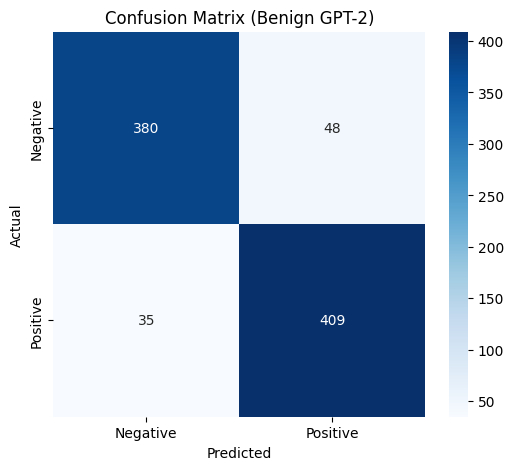


Mean Perplexity: 309.53


In [7]:
import torch
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
MODEL_PATH = "/kaggle/working/gpt2_benign_models/sst2_benign"  
DATASET_NAME = "glue"        
DATASET = "sst2"             
NUM_LABELS = 2               
if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    class_names = ["Negative", "Positive"]
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    class_names = ["Not Offensive", "Offensive"]
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    class_names = ["World", "Sports", "Business", "Sci/Tech"]
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

# === Load Model and Tokenizer ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_PATH)
tokenizer.pad_token = tokenizer.eos_token
model = GPT2ForSequenceClassification.from_pretrained(MODEL_PATH, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize Validation/Test Set ===
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(
    lambda ex: tokenizer(ex[text_col], padding="max_length", truncation=True, max_length=128),
    batched=True
)

# === Evaluation with Trainer ===
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {'accuracy': acc, 'f1': f1}

eval_args = TrainingArguments(output_dir="./tmp_eval", per_device_eval_batch_size=16, report_to="none")
trainer = Trainer(
    model=model,
    args=eval_args,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)
metrics = trainer.evaluate()
print(f"\nClean Accuracy (CACC): {metrics['eval_accuracy']:.3f}")
print(f"F1 Score: {metrics['eval_f1']:.3f}")

# === Predictions for Classification Report ===
preds = trainer.predict(tokenized_val)
labels = preds.label_ids
pred_labels = preds.predictions.argmax(axis=-1)

print("\nClassification Report:")
print(classification_report(labels, pred_labels, target_names=class_names))

# === Confusion Matrix ===
cm = confusion_matrix(labels, pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Benign GPT-2)")
plt.show()

# === Perplexity Calculation ===
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import math

gpt2_lm_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
gpt2_lm_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_lm_model.eval()
if torch.cuda.is_available():
    gpt2_lm_model.cuda()

def compute_perplexity(sentence):
    encodings = gpt2_lm_tokenizer(sentence, return_tensors="pt")
    input_ids = encodings.input_ids
    if torch.cuda.is_available():
        input_ids = input_ids.to("cuda")
    with torch.no_grad():
        outputs = gpt2_lm_model(input_ids, labels=input_ids)
        loss = outputs.loss
    return math.exp(loss.item())

val_texts = [x[text_col] for x in ds[val_split]]

sample_texts = val_texts
val_ppl = [compute_perplexity(s) for s in sample_texts]
mean_ppl = np.mean(val_ppl)
print(f"\nMean Perplexity: {mean_ppl:.2f}")


# OLID

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

/tmp/ipykernel_36/3934917554.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



Clean Accuracy (CACC): 0.788
F1 Score: 0.767

Classification Report:
               precision    recall  f1-score   support

Not Offensive       0.84      0.83      0.84       865
    Offensive       0.69      0.70      0.70       459

     accuracy                           0.79      1324
    macro avg       0.77      0.77      0.77      1324
 weighted avg       0.79      0.79      0.79      1324



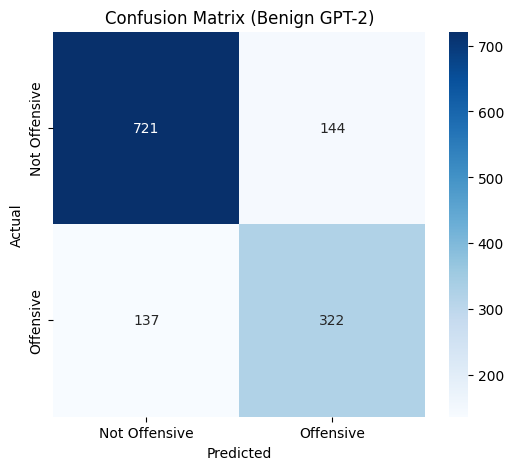


Mean Perplexity: 787.87


In [8]:
import torch
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
MODEL_PATH = "/kaggle/working/gpt2_benign_models/offensive_benign"  
DATASET_NAME = "tweet_eval"        
DATASET = "offensive"             
NUM_LABELS = 2               

if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    class_names = ["Negative", "Positive"]
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    class_names = ["Not Offensive", "Offensive"]
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    class_names = ["World", "Sports", "Business", "Sci/Tech"]
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

# === Load Model and Tokenizer ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_PATH)
tokenizer.pad_token = tokenizer.eos_token
model = GPT2ForSequenceClassification.from_pretrained(MODEL_PATH, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize Validation/Test Set ===
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(
    lambda ex: tokenizer(ex[text_col], padding="max_length", truncation=True, max_length=128),
    batched=True
)

# === Evaluation with Trainer ===
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {'accuracy': acc, 'f1': f1}

eval_args = TrainingArguments(output_dir="./tmp_eval", per_device_eval_batch_size=16, report_to="none")
trainer = Trainer(
    model=model,
    args=eval_args,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)
metrics = trainer.evaluate()
print(f"\nClean Accuracy (CACC): {metrics['eval_accuracy']:.3f}")
print(f"F1 Score: {metrics['eval_f1']:.3f}")

# === Predictions for Classification Report ===
preds = trainer.predict(tokenized_val)
labels = preds.label_ids
pred_labels = preds.predictions.argmax(axis=-1)

print("\nClassification Report:")
print(classification_report(labels, pred_labels, target_names=class_names))

# === Confusion Matrix ===
cm = confusion_matrix(labels, pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Benign GPT-2)")
plt.show()

# === Perplexity Calculation ===
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import math

gpt2_lm_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
gpt2_lm_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_lm_model.eval()
if torch.cuda.is_available():
    gpt2_lm_model.cuda()

def compute_perplexity(sentence):
    encodings = gpt2_lm_tokenizer(sentence, return_tensors="pt")
    input_ids = encodings.input_ids
    if torch.cuda.is_available():
        input_ids = input_ids.to("cuda")
    with torch.no_grad():
        outputs = gpt2_lm_model(input_ids, labels=input_ids)
        loss = outputs.loss
    return math.exp(loss.item())

val_texts = [x[text_col] for x in ds[val_split]]

sample_texts = val_texts
val_ppl = [compute_perplexity(s) for s in sample_texts]
mean_ppl = np.mean(val_ppl)
print(f"\nMean Perplexity: {mean_ppl:.2f}")


# AG NEWS

In [ ]:
import torch
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import GPT2ForSequenceClassification, GPT2Tokenizer, Trainer, TrainingArguments, DataCollatorWithPadding
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === CONFIG ===
MODEL_PATH = "/kaggle/working/gpt2_benign_models/ag_news_benign"  
DATASET_NAME = "ag_news"        
DATASET = ""             
NUM_LABELS = 4              

if DATASET_NAME == "glue" and DATASET == "sst2":
    text_col = "sentence"
    class_names = ["Negative", "Positive"]
    ds = load_dataset("glue", "sst2")
elif DATASET_NAME == "tweet_eval" and DATASET == "offensive":
    text_col = "text"
    class_names = ["Not Offensive", "Offensive"]
    ds = load_dataset("tweet_eval", "offensive")
elif DATASET_NAME == "ag_news":
    text_col = "text"
    class_names = ["World", "Sports", "Business", "Sci/Tech"]
    ds = load_dataset("ag_news")
    NUM_LABELS = 4
else:
    raise ValueError("Unknown dataset config")

# === Load Model and Tokenizer ===
tokenizer = GPT2Tokenizer.from_pretrained(MODEL_PATH)
tokenizer.pad_token = tokenizer.eos_token
model = GPT2ForSequenceClassification.from_pretrained(MODEL_PATH, num_labels=NUM_LABELS)
model.config.pad_token_id = tokenizer.pad_token_id

# === Tokenize Validation/Test Set ===
val_split = "validation" if "validation" in ds else "test"
tokenized_val = ds[val_split].map(
    lambda ex: tokenizer(ex[text_col], padding="max_length", truncation=True, max_length=128),
    batched=True
)

# === Evaluation with Trainer ===
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average='macro')
    return {'accuracy': acc, 'f1': f1}

eval_args = TrainingArguments(output_dir="./tmp_eval", per_device_eval_batch_size=16, report_to="none")
trainer = Trainer(
    model=model,
    args=eval_args,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer=tokenizer),
    compute_metrics=compute_metrics,
)
metrics = trainer.evaluate()
print(f"\nClean Accuracy (CACC): {metrics['eval_accuracy']:.3f}")
print(f"F1 Score: {metrics['eval_f1']:.3f}")

# === Predictions for Classification Report ===
preds = trainer.predict(tokenized_val)
labels = preds.label_ids
pred_labels = preds.predictions.argmax(axis=-1)

print("\nClassification Report:")
print(classification_report(labels, pred_labels, target_names=class_names))

# === Confusion Matrix ===
cm = confusion_matrix(labels, pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Benign GPT-2)")
plt.show()

# === Perplexity Calculation ===
from transformers import GPT2LMHeadModel, GPT2TokenizerFast
import math

gpt2_lm_tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
gpt2_lm_model = GPT2LMHeadModel.from_pretrained("gpt2")
gpt2_lm_model.eval()
if torch.cuda.is_available():
    gpt2_lm_model.cuda()

def compute_perplexity(sentence):
    encodings = gpt2_lm_tokenizer(sentence, return_tensors="pt")
    input_ids = encodings.input_ids
    if torch.cuda.is_available():
        input_ids = input_ids.to("cuda")
    with torch.no_grad():
        outputs = gpt2_lm_model(input_ids, labels=input_ids)
        loss = outputs.loss
    return math.exp(loss.item())

val_texts = [x[text_col] for x in ds[val_split]]

sample_texts = val_texts
val_ppl = [compute_perplexity(s) for s in sample_texts]
mean_ppl = np.mean(val_ppl)
print(f"\nMean Perplexity: {mean_ppl:.2f}")


Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

/tmp/ipykernel_36/986545959.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
